In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
from math import sqrt
import statsmodels.api as sm
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

# Plot Style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
sns.set_theme(style='darkgrid', palette='pastel', )
plt.rcParams['figure.facecolor'] = 'e7fff7' #https://www.colorhexa.com/ffe5b4
subplot_fontsize = 15
mainplot_fontsize = 20
scatterpoint_fontsize = 20

In [ ]:
df = pd.read_csv("/content/Algerian_forest_fires_cleaned.csv", header =0)

In [ ]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df.shape

(243, 15)

In [ ]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
df.info() # classes is categorical remanining are numerical dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [ ]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
# Check frequency counts for each column to get an idea of the range of data for each
for eachSeries in df:
    print(f'--- Number of Unique values for {eachSeries} ---')
    num_unique = df[eachSeries].unique()
    print(len(num_unique))

--- Number of Unique values for day ---
31
--- Number of Unique values for month ---
4
--- Number of Unique values for year ---
1
--- Number of Unique values for Temperature ---
19
--- Number of Unique values for RH ---
62
--- Number of Unique values for Ws ---
18
--- Number of Unique values for Rain ---
39
--- Number of Unique values for FFMC ---
173
--- Number of Unique values for DMC ---
165
--- Number of Unique values for DC ---
197
--- Number of Unique values for ISI ---
106
--- Number of Unique values for BUI ---
173
--- Number of Unique values for FWI ---
125
--- Number of Unique values for Classes ---
8
--- Number of Unique values for Region ---
2


In [ ]:
# need to convert categorical to numerical

df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

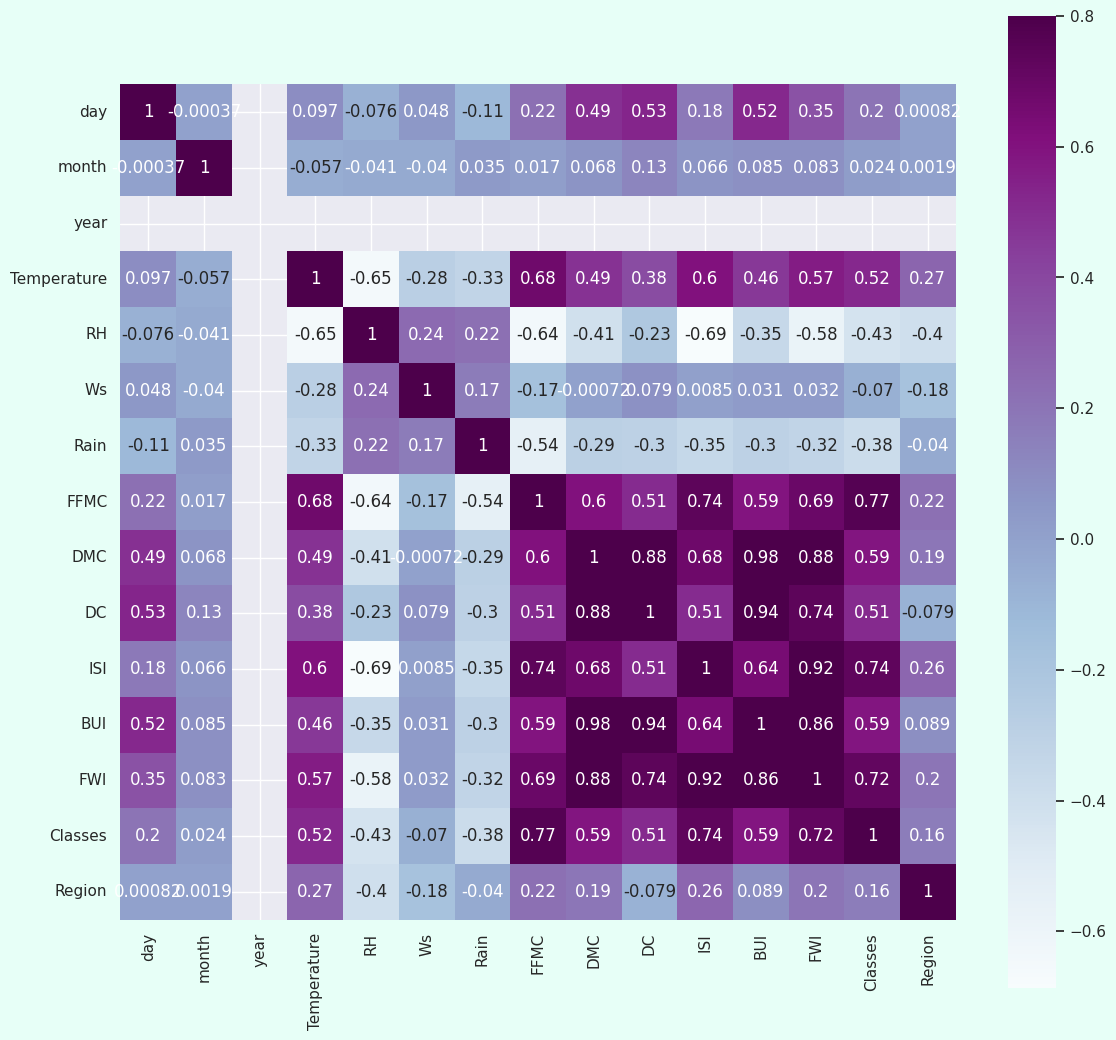

In [ ]:
# Compute pairwise correlation of data and visualize
model_data_matrix = df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(model_data_matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()

In [ ]:
# Compute for cut-off scores for outlier values of Chance of Admit
quartile_75, quartile_q25 = np.percentile(df.loc[:,'FWI'],[75,25])
interquartile_range = quartile_75 - quartile_q25

max = quartile_75 + ( 1.5 * interquartile_range )
min = quartile_q25 - ( 1.5 * interquartile_range )

print('min', min)
print('max', max)

# Tag outliers
outlier_tag = []

for row in df['FWI']:
    if (row < min) or (row > max):
        outlier_tag.append(1)
    else:
        outlier_tag.append(0)

# Add a column for outlier tag
df['outlier_tag'] = outlier_tag

outlier_obs = df[(df['outlier_tag']==1)]
print('\n\nOutlier Obs:\n',outlier_obs)


# Remove outliers from final model data
model_data_wo_outlier = df[(df['outlier_tag']==0)]
print('\n\n')
model_data_wo_outlier.info()

min -15.425
max 27.575


Outlier Obs:
      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
89    29      8  2012           35  48  18   0.0  90.1  54.2  220.4  12.5   
171   21      7  2012           36  29  18   0.0  93.9  39.6   80.6  18.5   
206   25      8  2012           34  40  18   0.0  92.1  56.3  157.5  14.3   
207   26      8  2012           33  37  16   0.0  92.2  61.3  167.2  13.1   

      BUI   FWI  Classes  Region  outlier_tag  
89   67.4  30.2        1       0            1  
171  39.5  30.0        1       1            1  
206  59.5  31.1        1       1            1  
207  64.0  30.3        1       1            1  



<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          239 non-null    int64  
 1   month        239 non-null    int64  
 2   year         239 non-null    int64  
 3   Temperature 

In [ ]:
# I tried removing the 4 outlier values obs. 89,171,206,207 but it did not improve the model so keeping the data


In [324]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region', 'outlier_tag'],
      dtype='object')

In [345]:
# Removed columns due to multicollinearity to satisfy VIF values
# Based on the matrix we are using the below variables
y_var = 'FWI'
x_vars = [
       'BUI','Classes', 'Region']

In [346]:
# Get the values of y (dependent variable)
y_values = df[y_var]

In [347]:
# Get the values of x (independent variables)
x_values = df[x_vars]

In [384]:

# Split the data into training (80%) and testing (20%) datasets
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.2,random_state=1234)

print(x_train,y_train)

      BUI  Classes  Region
43    8.4        0       0
180  23.8        1       1
170  32.6        1       1
111  16.0        1       0
65   11.5        1       0
..    ...      ...     ...
204  50.2        1       1
53   14.7        0       0
38    7.4        0       0
211  35.7        1       1
47   14.2        1       0

[194 rows x 3 columns] 43      0.8
180    13.2
170    17.3
111     6.3
65      6.1
       ... 
204    24.5
53      1.3
38      0.6
211    16.0
47      6.0
Name: FWI, Length: 194, dtype: float64


In [385]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_y = StandardScaler()

In [386]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)


y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


In [387]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


y_train_sc = scaler_y.fit_transform(y_train)


y_test_sc = scaler_y.transform(y_test)

In [388]:
# Fit the regression line
model = sm.OLS(y_train_sc, x_train_sc).fit()
y_pred_test = model.predict(x_test_sc)
print(y_pred_test)


[-0.58612863  0.4362674  -1.1213503  -0.55087746  0.52132176 -0.13970233
 -1.11682274  0.14650342  0.30949566 -0.31627726 -0.90305799 -0.56801838
  0.29591297  0.47151857 -0.26564103 -0.03912664 -0.02198571  0.04689705
 -1.11229518 -0.88494774  0.19080971 -0.75817599 -1.12587786 -0.03459907
 -0.6776492  -1.16662592  0.32391139  0.56756671 -0.76723112 -0.52274276
  0.6480935  -1.18473617 -0.7808138   0.05142461  0.92977169 -0.75364843
  1.17878761 -1.17115349 -0.80797918 -1.19831886 -0.8813895   0.49965327
  0.95144017  0.59829032 -0.74006574  1.33272473  0.00162142 -1.16662592
 -0.98099587]


In [394]:
# R2

from sklearn.metrics import r2_score

print(f'R2 (Test): {r2_score(y_test_sc,y_pred_test)}')

R2 (Test): 0.7858424293416268


In [392]:
# RMSE, MAE, MAPE
rmse_test = sqrt(mean_squared_error(y_test_sc, y_pred_test))
mape_test = mean_absolute_percentage_error(y_test_sc, y_pred_test)
mae_test = mean_absolute_error(y_test_sc, y_pred_test)

print(f'RMSE (Test): {round(rmse_test,2)}')
print(f'MAPE (Test): {round(mape_test*100,2)}%')
print(f'MAE (Test): {round(mae_test*100,2)}%')

RMSE (Test): 0.4
MAPE (Test): 79.45%
MAE (Test): 28.05%


In [390]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF Factors. For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_values.values, i) for i in range(x_values.shape[1])]
vif["Predictors"] = x_values.columns

# Inspect VIF Factors. VIF should be <10
vif.round(1)

# NO COLLINEARITY OBSERVED

,VIF Factor,Predictors
0,3.2,BUI
1,3.4,Classes
2,1.6,Region


In [398]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler_x.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('scaler_y.pkl', 'wb') as file:
    pickle.dump(scaler_y, file)


In [ ]:
import pickle


with open('/content/model.pkl', 'rb') as file:
    model = pickle.load(file)


with open('/content/scaler_x.pkl', 'rb') as file:
    scale = pickle.load(file)


with open('/content/scaler_y.pkl', 'rb') as file:
    scaler_y = pickle.load(file)


In [416]:
import pandas as pd

new_x = pd.DataFrame({
    'BUI': [2, 45, 61, 39, 27],
    'Classes': [0, 1, 0, 1, 0],
    'Region': [0, 1, 0, 1, 1]
})
# we can drop the remaining due to collinearity

In [417]:
new_x_scaled = scaler.transform(new_x)

In [418]:
y_pred_unscaled = model.predict(new_x_scaled)

In [423]:
print(scaler_y.inverse_transform(y_pred_unscaled.reshape(-1,1)))

[[-1.32721385]
 [19.47540203]
 [18.89178904]
 [17.41923224]
 [ 8.65254652]]


In [ ]:
'''
Pickle values are easy to use and store machine learning models.
They are platform independent. I once used pickle files to store ML model and use that pickled file to predict a value in django.

They can easily be sereallised. Thats how ML models are being stored. and then can be used just by loading it in no time

Pickling can be more efficient than manually writing and reading data to and from text files.
It preserves the structure of complex data types, so you don't need to write custom code to save and load them.

I also faced python versioning issues earlier.
Pickle files may not be compatible between different Python versions. So, if you pickle data in Python 2.x, it may not load correctly in Python 3.x.

'''